In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import itertools





def main():
    # read and preprocess the movie data
    movie = pd.read_table('/content/drive/My Drive/Colab Notebooks/Pandas/movies.dat', sep='::', names=['movie_id', 'movie_name', 'tag'], engine='python')
    movie.to_csv("rewards.csv", index=False)

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Pandas/rewards.csv")
df

,movie_id,movie_name,tag
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
df['tag'].value_counts()

Drama                                    843
Comedy                                   521
Horror                                   178
Comedy|Drama                             162
Comedy|Romance                           142
                                        ... 
Action|Adventure|Western                   1
Drama|Romance|Sci-Fi                       1
Action|Adventure|Horror|Thriller           1
Horror|Mystery                             1
Adventure|Animation|Children's|Sci-Fi      1
Name: tag, Length: 301, dtype: int64

In [ ]:
#Action = "red,orange,blue"
#Animation="violet,pink,blue,orange,yellow"
#Children's="yellow,blue,pink"
#Comedy="yellow,orange"
#Crime="red,black,violet"
#Documentary="orange,yellow,green,blue,brown"
#Drama="blue,pink,white,red"
#Fantasy="purple"
#Film-Noir="orange,blue,black"
#Horror="black,red,green"
#Adventure ="orange,blue"
#Musical="green,blue,purple,cyan"
#Mystery="indigo,black,purple,cyan"
#Romance="red,pink,green,black"
#Sci-Fi="orange,indigo"
#Thriller="red,black"
#War="yellow,orange,red,blue,black"
#Western="orange,yellow"

In [ ]:
df['tag'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

In [ ]:
import numpy as np

In [ ]:
conditions = [
    (df['tag'] == "Animation"),
    (df['tag'] == "Action"),
    (df['tag'] == "Adventure"),
    (df['tag'] == "Children's"),
    (df['tag'] == "Comedy"),
    (df['tag'] == "Crime"),
    (df['tag'] == "Documentary"),
    (df['tag'] == "Drama"),
    (df['tag'] == "Fantasy"),
    (df['tag'] == "Film-Noir"),
    (df['tag'] == "Horror"),
    (df['tag'] == "Musical"),
    (df['tag'] == "Mystery"),
    (df['tag'] == "Romance"),
    (df['tag'] == "Sci-Fi"),
    (df['tag'] == "Thriller"),
    (df['tag'] == "War"),
    (df['tag'] == "Western"),
    (df['tag'] == "Animation|Children's|Comedy"),
    (df['tag'] == "Adventure|Children's|Fantasy"),
    (df['tag'] == "Comedy|Romance"),
    (df['tag'] == "Comedy|Drama"),
    (df['tag'] == "Action|Crime|Thriller"),
    (df['tag'] == "Adventure|Children's"),
    (df['tag'] == "Action|Adventure|Thriller"),
    (df['tag'] == "Comedy|Drama|Romance"),
    (df['tag'] == "Comedy|Horror"),
    (df['tag'] == "Animation|Children's"),
    (df['tag'] == "Action|Adventure|Romance"),
    (df['tag'] == "Drama|Thriller"),
    (df['tag'] == "Drama|Romance"),
    (df['tag'] == "Action|Comedy|Drama"),
    (df['tag'] == "Crime|Drama|Thriller"),
    (df['tag'] == "Drama|Sci-Fi"),
    (df['tag'] == "Adventure|Sci-Fi"),
    (df['tag'] == "Adventure|Romance"),
    (df['tag'] == "Children's|Comedy|Drama"),
    (df['tag'] == "Drama|War"),
    (df['tag'] == "Action|Crime|Drama"),
    (df['tag'] == "Action|Adventure"),
    (df['tag'] == "Crime|Thriller"),
    (df['tag'] == "Action|Children's|Musical|Romance"),
    (df['tag'] == "Action|Drama|War"),
    (df['tag'] == "Action|Adventure|Crime"),
    (df['tag'] == "Drama|Mystery|Romance"),
    (df['tag'] == "Action|Drama"),
    (df['tag'] == "Drama|Romance|War"),
    (df['tag'] == "Action|Adventure|Comedy|Crime"),
    (df['tag'] == "Comedy|War"),
    (df['tag'] == "Action|Adventure|Mystery|Sci-Fi"),
    (df['tag'] == "Drama|Thriller|War"),
    (df['tag'] == "Action|Romance|Thriller"),
    (df['tag'] == "Crime|Film-Noir|Mystery|Thriller"),
    (df['tag'] == "Action|Adventure|Drama|Romance"),
    (df['tag'] == "Adventure|Children's|Drama"),
    (df['tag'] == "Action|Sci-Fi|Thriller"),
    (df['tag'] == "Action|Adventure|Sci-Fi"),
    (df['tag'] == "Action|Children's"),
    (df['tag'] == "Horror|Sci-Fi"),
    (df['tag'] == "Action|Crime|Sci-Fi"),
    (df['tag'] == "Animation|Children's|Comedy|Romance"),
    (df['tag'] == "Children's|Drama"),
    (df['tag'] == "Crime|Drama"),
    (df['tag'] == "Drama|Fantasy|Romance|Thriller"),
    (df['tag'] == "Drama|Horror"),
    (df['tag'] == "Comedy|Sci-Fi"),
    (df['tag'] == "Mystery|Thriller"),
    (df['tag'] == "Adventure|Children's|Comedy|Fantasy|Romance"),
    (df['tag'] == "Action|Adventure|Fantasy|Sci-Fi"),
    (df['tag'] == "Drama|Romance|War|Western"),
    (df['tag'] == "Action|Crime"),
    (df['tag'] == "Crime|Drama|Romance|Thriller"),
    (df['tag'] == "Action|Adventure|Western"),
    (df['tag'] == "Horror|Thriller"),(df['tag'] == "Children's|Comedy|Fantasy"),
    (df['tag'] == "Action|Comedy|Musical|Sci-Fi"),
    (df['tag'] == "Film-Noir|Thriller"),
    (df['tag'] == "Drama|Mystery|Thriller"),
    (df['tag'] == "Comedy|Romance|War"),
    (df['tag'] == "Action|Comedy"),
    (df['tag'] == "Adventure|Children's|Romance"),
    (df['tag'] == "Animation|Children's|Musical"),
    (df['tag'] == "Comedy|Crime|Fantasy"),
   (df['tag'] == "Action|Comedy|Western"),(df['tag'] == "Action|Sci-Fi"),
   (df['tag'] == "Action|Adventure|Comedy|Romance"),(df['tag'] == "Comedy|Crime|Drama"),
    (df['tag'] == "Comedy|Thriller"),
    (df['tag'] == "Horror|Sci-Fi|Thriller"),
    (df['tag'] == "Mystery|Romance|Thriller"),(df['tag'] == "Comedy|Western"),
   (df['tag'] == "Drama|Western"),
   (df['tag'] == "Action|Adventure|Crime|Thriller"),
   (df['tag'] == "Action|Comedy|War"),(df['tag'] == "Comedy|Mystery"),
   (df['tag'] == "Comedy|Mystery|Romance"),
   (df['tag'] == "Comedy|Drama|War"),
   (df['tag'] == "Action|Drama|Mystery"),(df['tag'] == "Comedy|Crime|Horror"),
    (df['tag'] == "Film-Noir|Sci-Fi"),
    (df['tag'] == "Comedy|Romance|Thriller"),
    (df['tag'] == "Action|Adventure|Children's|Sci-Fi"),
    (df['tag'] == "Children's|Comedy|Musical"),
    (df['tag'] == "Action|Adventure|Comedy"),
    (df['tag'] == "Action|Crime|Romance"),
    (df['tag'] == "Action|Adventure|Animation|Children's|Fantasy"),(df['tag'] == "Animation|Children's|Comedy|Musical"),
    (df['tag'] == "Adventure|Drama|Western"),(df['tag'] == "Action|Adventure|Crime|Drama"),
     (df['tag'] == "Action|Adventure|Animation|Horror|Sci-Fi"),(df['tag'] == "Action|Horror|Sci-Fi"),
    (df['tag'] == "Action|Adventure|Mystery"),(df['tag'] == "Action|Adventure|Fantasy"),
    (df['tag'] == "Adventure|Animation|Children's|Comedy|Fantasy"),(df['tag'] == "Documentary|Drama"),
    (df['tag'] == "Action|Adventure|Comedy|War"),(df['tag'] == "Crime|Film-Noir|Thriller"),
    (df['tag'] == "Action|Adventure|Romance|Thriller"),(df['tag'] == "Animation|Sci-Fi"),
 (df['tag'] == "Animation|Comedy|Thriller"),(df['tag'] == "Sci-Fi|War"),
 (df['tag'] == "Comedy|Crime"),(df['tag'] == "Action|Sci-Fi|War"),
  (df['tag'] == "Comedy|Fantasy|Romance|Sci-Fi"),
  (df['tag'] == "Action|Mystery|Thriller"),
  (df['tag'] == "Comedy|Musical"),(df['tag'] == "Action|Adventure|Sci-Fi|Thriller"),
  (df['tag'] == "Children's|Drama|Fantasy"),
  (df['tag'] == "Adventure|War"),
  (df['tag'] == "Musical|Romance"),(df['tag'] == "Comedy|Musical|Romance"),
    (df['tag'] == "Comedy|Mystery|Romance|Thriller"),
    (df['tag'] == "Film-Noir|Mystery"),
    (df['tag'] == "Adventure|Children's|Drama|Musical"),(df['tag'] == "Drama|Mystery|Sci-Fi|Thriller"),
  (df['tag'] == "Romance|Thriller"),
  (df['tag'] == "Film-Noir|Romance|Thriller"),
  (df['tag'] == "Crime|Film-Noir|Mystery"),(df['tag'] == "Adventure|Comedy"),
  (df['tag'] == "Action|Adventure|Romance|War"),
  (df['tag'] == "Romance|War"),
  (df['tag'] == "Action|Drama|Western"),
    (df['tag'] =="Children's|Comedy|Western"),
    (df['tag'] == "Adventure|Children's|Comedy"),
    (df['tag'] == "Children's|Comedy|Mystery"),
    (df['tag'] == "Adventure|Children's|Fantasy|Sci-Fi"),
    (df['tag'] == "Adventure|Animation|Children's|Musical"),
    (df['tag'] == "Adventure|Children's|Musical"),
    (df['tag'] == "Crime|Film-Noir"),
    (df['tag'] == "Adventure|Children's|Comedy|Fantasy"),
    (df['tag'] == "Children's|Drama|Fantasy|Sci-Fi"),
    (df['tag'] == "Action|Romance"),
    (df['tag'] == "Adventure|Western"),
    (df['tag'] == "Comedy|Fantasy"),
    (df['tag'] == "Animation|Comedy"),
    (df['tag'] == "Crime|Drama|Film-Noir"),
    (df['tag'] == "Action|Adventure|Drama|Sci-Fi|War"),
    (df['tag'] == "Action|Sci-Fi|Thriller|War"),
    (df['tag'] == "Action|Western"),
    (df['tag'] == "Action|Animation|Children's|Sci-Fi|Thriller|War"),
    (df['tag'] == "Action|Adventure|Romance|Sci-Fi|War"),
     (df['tag'] == "Action|Horror|Sci-Fi|Thriller"),
    (df['tag'] == "Action|Adventure|Comedy|Horror|Sci-Fi"),
    (df['tag'] == "Action|Comedy|Musical"),
    (df['tag'] == "Mystery|Sci-Fi"),
    (df['tag'] == "Film-Noir|Mystery|Thriller"),
    (df['tag'] == "Adventure|Comedy|Drama"),
    (df['tag'] == "Action|Adventure|Comedy|Horror"),
    (df['tag'] == "Action|Drama|Mystery|Romance|Thriller"),
    (df['tag'] == "Comedy|Mystery|Thriller"),
    (df['tag'] == "Adventure|Animation|Sci-Fi|Thriller"),
    (df['tag'] == "Action|Drama|Romance"),
    (df['tag'] == "Action|Adventure|Drama"),
    (df['tag'] == "Comedy|Drama|Musical"),
    (df['tag'] == "Documentary|War"),
    (df['tag'] == "Drama|Musical|War"),
    (df['tag'] == "Action|Horror"),
    (df['tag'] == "Horror|Romance"),
    (df['tag'] == "Action|Comedy|Sci-Fi|War"),
    (df['tag'] == "Crime|Drama|Sci-Fi"),
    (df['tag'] == "Action|Romance|War"),
     (df['tag'] == "Action|Comedy|Crime|Drama"),
    (df['tag'] == "Action|Drama|Thriller|War"),
    (df['tag'] == "Action|Adventure|Children's"),
    (df['tag'] == "Action|Adventure|Children's|Fantasy"),
    (df['tag'] == "Adventure|Animation|Children's|Comedy|Musical"),
    (df['tag'] == "Crime|Drama|Mystery"),
    (df['tag'] == "Action|Adventure|Comedy|Sci-Fi"),
    (df['tag'] == "Children's|Fantasy"),
    (df['tag'] == "Action|Mystery|Sci-Fi|Thriller"),
    (df['tag'] == "Action|Mystery|Romance|Thriller"),
    (df['tag'] == "Adventure|Thriller"),
    (df['tag'] == "Action|Thriller|War"),
    (df['tag'] == "Action|Crime|Mystery"),
    (df['tag'] == "Horror|Mystery|Thriller"),
    (df['tag'] == "Crime|Horror|Mystery|Thriller"),
    (df['tag'] == "Comedy|Drama|Thriller"),
    (df['tag'] == "Drama|Sci-Fi|Thriller"),
    (df['tag'] == "Drama|Romance|Thriller"),
    (df['tag'] == "Action|Adventure|Sci-Fi|War"),
    (df['tag'] == "Comedy|Crime|Drama|Mystery"),
     (df['tag'] == "Comedy|Crime|Mystery|Thriller"),
    (df['tag'] == "Film-Noir|Sci-Fi|Thriller"),
    (df['tag'] == "Adventure|Sci-Fi|Thriller"),
    (df['tag'] == "Crime|Drama|Mystery|Thriller"),
    (df['tag'] == "Comedy|Documentary"),
    (df['tag'] == "Documentary|Musical"),
    (df['tag'] == "Action|Drama|Sci-Fi|Thriller"),
    (df['tag'] == "Adventure|Animation|Children's|Fantasy"),
    (df['tag'] == "Adventure|Comedy|Romance"),
    (df['tag'] == "Mystery|Sci-Fi|Thriller"),
    (df['tag'] == "Action|Comedy|Crime"),
    (df['tag'] == "Animation|Children's|Fantasy|War"),
    (df['tag'] == "Action|Crime|Drama|Thriller"),
    (df['tag'] == "Comedy|Sci-Fi|Western"),
    (df['tag'] == "Children's|Fantasy|Musical"),
    (df['tag'] == "Fantasy|Sci-Fi"),
    (df['tag'] == "Children's|Comedy|Sci-Fi"),
    (df['tag'] == "Action|Adventure|Children's|Comedy"),
    (df['tag'] == "Adventure|Children's|Drama|Romance"),
    (df['tag'] == "Adventure|Children's|Sci-Fi") ,
    (df['tag'] == "Adventure|Children's|Comedy|Fantasy|Sci-Fi"),
    (df['tag'] =="Animation|Children's|Comedy|Musical|Romance"),
    (df['tag'] == "Children's|Musical"),
    (df['tag'] == "Drama|Fantasy"),
    (df['tag'] == "Animation|Children's|Fantasy|Musical"),
    (df['tag'] == "Adventure|Comedy|Musical"),
    (df['tag'] == "Children's|Sci-Fi"),
    (df['tag'] == "Children's|Horror"),
    (df['tag'] == "Comedy|Fantasy|Romance"),
    (df['tag'] == "Comedy|Crime|Thriller"),
    (df['tag'] == "Adventure|Animation|Children's|Sci-Fi"),
    (df['tag'] == "Action|Crime|Mystery|Thriller"),
    (df['tag'] == "Adventure|Musical"),
    (df['tag'] == "Animation|Children's|Drama|Fantasy"),
    (df['tag'] == "Children's|Fantasy|Sci-Fi"),
    (df['tag'] == "Adventure|Fantasy|Romance"),
    (df['tag'] == "Crime|Horror"),
    (df['tag'] == "Action|Adventure|Horror"),
    (df['tag'] == "Adventure|Fantasy|Sci-Fi"),
    (df['tag'] == "Drama|Film-Noir|Thriller"),
    (df['tag'] == "Action|Comedy|Fantasy"),
    (df['tag'] == "Sci-Fi|Thriller|War"),
    (df['tag'] == "Action|Adventure|Sci-Fi|Thriller|War"),
    (df['tag'] == "Action|Adventure|Drama|Thriller"),
    (df['tag'] == "Crime|Horror|Thriller"),
    (df['tag'] == "Animation|Musical"),
    (df['tag'] == "Action|War"),
    (df['tag'] == "Action|Comedy|Romance|Thriller"),
    (df['tag'] == "Comedy|Horror|Thriller"),
    (df['tag'] == "Drama|Horror|Thriller"),
    (df['tag'] == "Action|Sci-Fi|Thriller|Western"),
    (df['tag'] == "Drama|Romance|Sci-Fi"),
    (df['tag'] == "Action|Adventure|Horror|Thriller"),
    (df['tag'] == "Comedy|Film-Noir|Thriller"),
    (df['tag'] == "Comedy|Horror|Musical|Sci-Fi"),
    (df['tag'] == "Comedy|Romance|Sci-Fi"),
    (df['tag'] == "Action|Comedy|Sci-Fi|Thriller"),
    (df['tag'] == "Action|Sci-Fi|Western"),
    (df['tag'] == "Comedy|Horror|Musical"),
    (df['tag'] == "Crime|Mystery"),
    (df['tag'] == "Animation|Mystery"),
    (df['tag'] == "Action|Horror|Thriller"),
    (df['tag'] == "Action|Drama|Fantasy|Romance"),
    (df['tag'] == "Horror|Mystery"),
    (df['tag'] == "Adventure|Animation|Children's"),
    (df['tag'] == "Musical|Romance|War"),
    (df['tag'] == "Adventure|Drama|Romance"),
    (df['tag'] == "Adventure|Animation|Film-Noir"),
    (df['tag'] == "Action|Adventure|Animation"),
    (df['tag'] == "Comedy|Drama|Western"),
    (df['tag'] == "Adventure|Comedy|Sci-Fi"),
    (df['tag'] == "Drama|Romance|Western"),
    (df['tag'] == "Comedy|Drama|Sci-Fi"),
    (df['tag'] == "Action|Drama|Romance|Thriller"),
    (df['tag'] == "Adventure|Romance|Sci-Fi"),
    (df['tag'] == "Film-Noir|Horror"),
    (df['tag'] == "Crime|Drama|Film-Noir|Thriller"),
    (df['tag'] == "Action|Adventure|War"),
    (df['tag'] == "Romance|Western"),
    (df['tag'] == "Action|Children's|Fantasy"),
    (df['tag'] == "Adventure|Drama|Thriller"),
    (df['tag'] == "Adventure|Fantasy"),
    (df['tag'] == "Musical|War"),
    (df['tag'] == "Adventure|Musical|Romance"),
    (df['tag'] == "Action|Romance|Sci-Fi"),
    (df['tag'] == "Drama|Film-Noir"),
    (df['tag'] == "Comedy|Horror|Sci-Fi"),
    (df['tag'] == "Adventure|Drama|Romance|Sci-Fi"),
    (df['tag'] == "Adventure|Animation|Sci-Fi"),
    (df['tag'] == "Adventure|Crime|Sci-Fi|Thriller")
    ]

# create a list of the values we want to assign for each condition
values = ['violet,pink,blue,orange,yellow','red,orange,blue','orange,blue','yellow,blue,pink','yellow,orange',
          'red,black,violet','orange,yellow,green,blue,brown','blue,pink,white,red','purple','orange,blue,black',
          'black,red,green','green,blue,purple,cyan','indigo,black,purple,cyan','red,pink,green,black',
          'orange,indigo','red,black','yellow,orange,red,blue,black','orange,yellow','violet,pink,blue,orange,yellow', 'orange,blue,pink,yellow,purple','red,pink,green,black,yellow,orange',
          'red,orange,blue,pink,yellow,white','red,orange,blue,violet,yellow,black','orange,blue,pink,yellow','red,orange,blue,black',
          'red,orange,blue,pink,yellow,black,green,white','red,orange,yellow,black,green','orange,blue,violet,pink,yellow','red,orange,blue,pink,black,green',
          'blue,pink,white,red,black','blue,pink,white,red,green,black','red,blue,orange,pink,yellow,white','red,blue,pink,black,white,violet','red,orange,blue,pink,white,indigo','orange,blue,indigo','red,orange,blue,pink,black,green',
          'red,orange,blue,pink,yellow,white','red,blue,orange,pink,yellow,black,white','red,orange,blue,violet,pink,black,white','red,orange,blue','red,black,violet','red,orange,blue,yellow,pink,green,purple,cyan,black',
          'red,orange,blue,pink,yellow,black,white','red,orange,blue,violet,black','blue,pink,white,red,indigo,black,purple,cyan,green','red,orange,blue,pink,white','yellow,orange,red,blue,black,pink,white','red,orange,blue,yellow',
          'yellow,orange,red,blue,black','red,orange,blue,indigo,black,purple,cyan','blue,pink,white,red,black,yellow,orange','red,pink,green,black,orange,blue',
          'red,black,violet,orange,blue,indigo,purple,cyan','red,orange,blue,pink,white,green,black','orange,blue,yellow,pink,white,red','red,orange,blue,indigo,black','red,orange,blue,indigo','red,orange,blue,yellow,pink','black,red,green,orange,indigo','red,orange,blue,black,violet,indigo','violet,pink,blue,orange,yellow,red,green,black',
          'yellow,pink,blue,white,red','red,black,violet,blue,pink,white','blue,pink,white,red,purple,green,black','blue,pink,white,red,black,green','yellow,orange,indigo','indigo,black,purple,cyan,red',
          'red,pink,green,black,orange,blue,purple,yellow','red,orange,blue,purple,indigo','red,pink,green,black,blue,white,yellow,orange','red,orange,blue,black,violet','red,black,violet,blue,pink,white,green','red,orange,blue,yellow','red,black,green','yellow,blue,pink,orange,purple',
          'red,orange,blue,yellow,green,purple,cyan,indigo','red,black,orange,blue','blue,pink,white,red,indigo,black,purple,cyan','yellow,orange,red,pink,green,black,blue',
          'yellow,orange,red,blue','orange,blue,yellow,pink,red,green,black','violet,pink,blue,orange,yellow,green,purple,cyan','yellow,orange,red,black,violet,purple',
          'red,orange,blue,yellow,','red,orange,blue,indigo','red,orange,blue,yellow,pink,green,black','yellow,orange,red,black,violet,blue,pink,white',
          'yellow,orange,red,black','black,red,green,orange,indigo','indigo,black,purple,cyan,red,pink,green','orange,yellow',
          'blue,pink,white,red,orange,yellow','red,orange,blue,black,violet','red,orange,blue,yellow,black','orange,yellow,indigo,black,purple,cyan',
          'orange,yellow,indigo,black,purple,cyan,red,pink,green','yellow,orange,blue,pink,white,red','red,orange,blue,pink,white,red,indigo,black,purple,cyan','orange,yellow,red,black,violet,green',
          'orange,blue,black,orange,indigo','orange,yellow,red,black,green,pink','red,orange,blue,yellow,pink,indigo','yellow,blue,pink,orange,green,purple,cyan',
          'red,orange,blue,yellow','red,orange,blue,black,violet,pink,green','red,orange,blue,violet,pink,yellow,purple','violet,pink,blue,orange,yellow,green,purple,cyan',
          'orange,blue,pink,white,red,yellow','red,orange,blue,black,violet,pink,white','red,orange,blue,black,violet,pink,blue,yellow,green,indigo','red,orange,blue,black,green,indigo',
          'red,orange,blue,indigo,black,purple,cyan','red,orange,blue,purple','violet,pink,blue,orange,yellow,purple','orange,yellow,green,blue,brown,blue,pink,white,red',
          'red,orange,blue,yellow,black','red,black,violet,orange,blue','red,orange,blue,pink,green,black,','violet,pink,blue,orange,yellow,indigo',
          'violet,pink,blue,orange,yellow,red,black','yellow,orange,red,blue,black,indigo','orange,yellow,red,black,violet','red,orange,blue,indigo,yellow,black',
          'red,pink,green,black,orange,yellow,purple,indigo','red,orange,blue,indigo,black,purple,cyan','yellow,orange,green,blue,purple,cyan','red,orange,blue,indigo,black',
          'yellow,blue,pink,white,red,purple','orange,blue,yellow,red,blue,black','green,blue,purple,cyan,red,pink,green,black','orange,yellow,green,blue,purple,cyan,red,pink,green,black',
          'yellow,orange,indigo,black,purple,cyan,red,pink,green','orange,blue,indigo,black,purple,cyan','orange,blue,yellow,blue,pink,white,green,purple,cyan','blue,pink,white,red,indigo,black,purple,cyan,orange,',
          'red,pink,green,black','orange,blue,red,pink,green,black','red,black,violet,orange,blue,indigo,black,purple,cyan','orange,blue,yellow',
          'red,orange,blue,pink,green,black,yellow','red,pink,green,black,yellow,orange,blue',
          'red,orange,blue,pink,white,yellow',
        'yellow,blue,pink,orange',
       'orange,blue,yellow,pink',
       'yellow,blue,pink,orange,indigo,black,purple,cyan',
       'orange,blue,yellow,pink,purple,indigo',
       'orange,blue,violet,pink,yellow,green,purple,cyan',
       'orange,blue,yellow,pink,green,purple,cyan',
       'red,black,violet,orange,blue',
       'orange,blue,yellow,pink,purple',
       'yellow,blue,pink,white,red,purple,orange,indigo',
        'red,orange,blue,pink,green,black',
       'orange,blue,yellow',
       'yellow,orange,purple',
       'violet,pink,blue,orange,yellow',
       'red,black,violet,blue,pink,white,orange',
       'red,orange,blue,pink,white,indigo,yellow,black',
       'red,orange,blue,indigo,black,yellow,black',
       'red,orange,blue,yellow',
       'red,orange,blue,violet,pink,yellow,indigo,black',
       'red,orange,blue,pink,green,black,indigo,yellow',
        'red,orange,blue,black,green,indigo',
       'red,orange,blue,yellow,black,green,indigo',
       'red,orange,blue,yellow,green,purple,cyan',
       'indigo,black,purple,cyan,orange,indigo',
       'orange,blue,black,indigo,purple,cyan,red',
       'orange,blue,yellow,pink,white,red',
       'red,orange,blue,yellow,black,green',
       'red,orange,blue,pink,white,indigo,black,purple,cyan,green',
       'yellow,orange,indigo,purple,cyan,red',
       'orange,blue,violet,pink,yellow,indigo,red,black',
       'red,orange,blue,pink,white,green,black',
       'red,orange,blue,pink,white',
       'yellow,orange,blue,pink,white,red,green,purple,cyan',
       'orange,yellow,green,blue,brown,red,black',
       'blue,pink,white,red,green,blue,purple,cyan,orange,yellow',
       'red,orange,blue,black,green',
       'black,red,green,pink',
       'red,orange,blue,yellow,indigo,black',
       'red,black,violet,blue,pink,white,red,orange,indigo',
       'red,orange,blue,pink,green,black,yellow',
        'red,orange,blue,yellow,black,violet,pink,white',
       'red,orange,blue,pink,white,black,yellow',
       'red,orange,blue,yellow,pink',
       'red,orange,blue,yellow,pink,purple',
       'orange,blue,violet,pink,yellow,green,purple,cyan',
        'red,black,violet,blue,pink,white,indigo,purple,cyan',
        'red,orange,blue,yellow,indigo',
        'yellow,blue,pink,purple',
        'red,orange,blue,indigo,black,purple,cyan',
        'red,orange,blue,indigo,black,purple,cyan,pink,green',
         'orange,blue,red,black',
       'red,orange,blue,black,yellow',
       'red,orange,blue,black,violet,indigo,purple,cyan',
       'black,red,green,indigo,purple,cyan',
       'red,black,violet,green,indigo,purple,cyan',
       'yellow,orange,blue,pink,white,red',
       'blue,pink,white,red,orange,indigo,black',
       'blue,pink,white,red,green,black',
       'red,orange,blue,indigo,yellow,black',
       'yellow,orange,red,black,violet,blue,pink,white,indigo,purple,cyan',
       'yellow,orange,red,black,violet,indigo,purple,cyan',
        'orange,blue,black,indigo,red',
       'orange,blue,indigo,red,black',
       'red,black,violet,blue,pink,white,indigo,purple,cyan',
       'yellow,orange,green,black,brown',
       'yellow,orange,green,black,brown,blue,purple,cyan',
       'red,orange,blue,pink,white,indigo,black',
       'orange,blue,violet,pink,yellow,purple',
       'orange,blue,yellow,red,pink,green,black',
       'indigo,black,purple,cyan,orange,red',
        'red,orange,blue,yellow,black,violet',
        'violet,pink,blue,orange,yellow,purple,red,black',
        'red,orange,blue,black,violet,pink,white',
        'yellow,orange,indigo',
        'yellow,blue,pink,purple,green,cyan',
        'purple,orange,indigo',
        'yellow,blue,pink,orange,indigo',
        'red,orange,blue,yellow,pink',
        'orange,blue,yellow,pink,white,red,green,black',
        'orange,blue,yellow,pink,indigo',
        'orange,blue,yellow,pink,purple,indigo',
        'orange,blue,yellow,pink,violet,green,purple,cyan,red,black',
       'blue,yellow,pink,green,purple,cyan',
       'red,white,blue,pink,purple',
       'orange,blue,yellow,pink,violet,purple,green,cyan',
       'orange,blue,yellow,green,purple,cyan',
       'blue,yellow,pink,indigo,orange',
       'blue,yellow,pink,red,black,green',
       'orange,yellow,purple,red,green,black,pink',
       'orange,yellow,red,blue,violet,black',
       'orange,blue,yellow,pink,violet,indigo',
       'red,orange,blue,violet,indigo,black,purple,cyan',
       'orange,blue,green,purple,cyan',
       'orange,blue,yellow,pink,violet,red,white,purple',
       'blue,yellow,pink,purple,indigo,orange',
       'orange,blue,purple,red,green,black,pink',
       'red,blue,violet,black,green',
       'red,orange,blue,black,green',
       'orange,blue,purple,indigo',
       'red,white,blue,pink,orange,black',
       'red,orange,blue,yellow,purple',
       'indigo,orange,red,black,blue,yellow',
       'red,orange,blue,indigo,black,yellow',
       'red,orange,blue,white,pink,black',
       'red,blue,violet,black,green',
       'orange,blue,yellow,pink,violet,green,purple,cyan',
       'red,orange,blue,yellow,black',
       'red,orange,blue,yellow,green,black,pink',
       'orange,yellow,red,black,green',
       'red,white,blue,pink,black,green',
       'red,orange,blue,indigo,black,yellow',
       'red,white,blue,pink,green,black,indigo,orange',
       'red,orange,blue,black,green',
       'orange,yellow,blue,black,red',
       'orange,yellow,red,black,green,blue,purple,cyan,indigo',
       'orange,yellow,red,green,black,pink,indigo',
       'red,orange,blue,yellow,indigo,black',
       'red,orange,blue,indigo,yellow',
       'orange,yellow,red,black,green,blue,purple,cyan',
       'red,blue,indigo,black,purple,cyan,violet',
       'orange,blue,yellow,pink,indigo,black,purple,cyan,violet',
       'red,orange,blue,black,green',
       'red,orange,blue,white,pink,purple,green,black',
       'red,black,green,indigo,purple',
       'orange,blue,yellow,pink,violet',
        'green,blue,purple,cyan,red,black,pink,orange,yellow',
        'orange,blue,red,white,pink,green,black',
        'orange,blue,yellow,pink,violet,black',
        'red,orange,blue,yellow,pink,violet',
        'orange,yellow,red,white,blue,pink',
        'orange,blue,yellow,indigo',
       'red,white,blue,pink,green,black,orange,yellow',
       'orange,yellow,red,white,blue,pink,indigo,orange',
       'red,orange,blue,white,pink,green,black',
       'orange,blue,red,green,black,pink,indigo',
       'orange,blue,black,red,green',
       'red,blue,violet,white,pink,orange,black',
       'red,orange,blue,yellow,black',
       'red,green,black,pink,orange,yellow',
       'red,orange,blue,yellow,pink,purple',
       'orange,blue,red,white,pink,black',
       'orange,blue,purple',
       'green,blue,purple,cyan,red,orange,yellow,black',
       'orange,blue,green,purple,cyan,red,black,pink',
       'red,orange,blue,green,black,pink,indigo',
       'red,white,blue,pink,orange,black',
       'orange,yellow,red,black,green,indigo',
       'orange,blue,red,white,pink,green,black,pink,indigo',
       'orange,blue,yellow,pink,violet,indigo',
       'orange,blue,red,violet,indigo,black'
          ]

# create a new column and use np.select to assign values to it using our lists as arguments
df['colour'] = np.select(conditions, values)

# display updated DataFrame
df


,movie_id,movie_name,tag,colour
0,1,Toy Story (1995),Animation|Children's|Comedy,"violet,pink,blue,orange,yellow"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"orange,blue,pink,yellow,purple"
2,3,Grumpier Old Men (1995),Comedy|Romance,"red,pink,green,black,yellow,orange"
3,4,Waiting to Exhale (1995),Comedy|Drama,"red,orange,blue,pink,yellow,white"
4,5,Father of the Bride Part II (1995),Comedy,"yellow,orange"
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,"yellow,orange"
3879,3949,Requiem for a Dream (2000),Drama,"blue,pink,white,red"
3880,3950,Tigerland (2000),Drama,"blue,pink,white,red"
3881,3951,Two Family House (2000),Drama,"blue,pink,white,red"


In [ ]:
print("Select one color from the set of given colors:")
print("1.RED \n"
      "2.ORANGE \n"
      "3.BLUE \n"
"4.VIOLET \n"
"5.PINK \n"
"6.YELLOW \n"
"7.BLACK \n"
"8.GREEN \n"
"9.BROWN \n"
"10.WHITE \n"
"11.PURPLE \n"
"12.CYAN \n"
"13.INDIGO")

Select one color from the set of given colors:
1.RED 
2.ORANGE 
3.BLUE 
4.VIOLET 
5.PINK 
6.YELLOW 
7.BLACK 
8.GREEN 
9.BROWN 
10.WHITE 
11.PURPLE 
12.CYAN 
13.INDIGO


In [ ]:
a=input()

orange


In [ ]:
res = [i for i in values if a in i]
res

['violet,pink,blue,orange,yellow',
 'red,orange,blue',
 'orange,blue',
 'yellow,orange',
 'orange,yellow,green,blue,brown',
 'orange,blue,black',
 'orange,indigo',
 'yellow,orange,red,blue,black',
 'orange,yellow',
 'violet,pink,blue,orange,yellow',
 'orange,blue,pink,yellow,purple',
 'red,pink,green,black,yellow,orange',
 'red,orange,blue,pink,yellow,white',
 'red,orange,blue,violet,yellow,black',
 'orange,blue,pink,yellow',
 'red,orange,blue,black',
 'red,orange,blue,pink,yellow,black,green,white',
 'red,orange,yellow,black,green',
 'orange,blue,violet,pink,yellow',
 'red,orange,blue,pink,black,green',
 'red,blue,orange,pink,yellow,white',
 'red,orange,blue,pink,white,indigo',
 'orange,blue,indigo',
 'red,orange,blue,pink,black,green',
 'red,orange,blue,pink,yellow,white',
 'red,blue,orange,pink,yellow,black,white',
 'red,orange,blue,violet,pink,black,white',
 'red,orange,blue',
 'red,orange,blue,yellow,pink,green,purple,cyan,black',
 'red,orange,blue,pink,yellow,black,white',
 'red,

In [ ]:
rslt_df= df[df['colour'].isin(res)]
rslt_df

,movie_id,movie_name,tag,colour
0,1,Toy Story (1995),Animation|Children's|Comedy,"violet,pink,blue,orange,yellow"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"orange,blue,pink,yellow,purple"
2,3,Grumpier Old Men (1995),Comedy|Romance,"red,pink,green,black,yellow,orange"
3,4,Waiting to Exhale (1995),Comedy|Drama,"red,orange,blue,pink,yellow,white"
4,5,Father of the Bride Part II (1995),Comedy,"yellow,orange"
...,...,...,...,...
3864,3934,Kronos (1957),Sci-Fi,"orange,indigo"
3873,3943,Bamboozled (2000),Comedy,"yellow,orange"
3874,3944,Bootmen (2000),Comedy|Drama,"red,orange,blue,pink,yellow,white"
3875,3945,Digimon: The Movie (2000),Adventure|Animation|Children's,"orange,blue,yellow,pink,violet"


In [ ]:
df1=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Pandas/rating (2).csv")
df1

,UserID,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
df1.rename(columns={'MovieID': 'movie_id'},inplace=True)

In [ ]:
df1

,UserID,movie_id,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
merged = pd.merge(rslt_df, df1, on=['movie_id'], how='inner')
merged

,movie_id,movie_name,tag,colour,UserID,Ratings,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,"violet,pink,blue,orange,yellow",1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,"violet,pink,blue,orange,yellow",6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,"violet,pink,blue,orange,yellow",8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,"violet,pink,blue,orange,yellow",9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,"violet,pink,blue,orange,yellow",10,5,978226474
...,...,...,...,...,...,...,...
677830,3948,Meet the Parents (2000),Comedy,"yellow,orange",5938,4,1002297887
677831,3948,Meet the Parents (2000),Comedy,"yellow,orange",5949,2,985052813
677832,3948,Meet the Parents (2000),Comedy,"yellow,orange",5950,4,1046369637
677833,3948,Meet the Parents (2000),Comedy,"yellow,orange",5972,2,986916093


In [ ]:
merged.sort_values("colour")

,movie_id,movie_name,tag,colour,UserID,Ratings,Timestamp
487518,2668,Swamp Thing (1982),Horror|Sci-Fi,"black,red,green,orange,indigo",4472,2,965069329
431561,2377,Lifeforce (1985),Horror|Sci-Fi,"black,red,green,orange,indigo",2279,3,974560970
431560,2377,Lifeforce (1985),Horror|Sci-Fi,"black,red,green,orange,indigo",2194,4,974607213
431559,2377,Lifeforce (1985),Horror|Sci-Fi,"black,red,green,orange,indigo",2181,2,974611008
431558,2377,Lifeforce (1985),Horror|Sci-Fi,"black,red,green,orange,indigo",2129,2,983418113
...,...,...,...,...,...,...,...
58669,356,Forrest Gump (1994),Comedy|Romance|War,"yellow,orange,red,pink,green,black,blue",4250,5,965309815
58668,356,Forrest Gump (1994),Comedy|Romance|War,"yellow,orange,red,pink,green,black,blue",4242,4,965312284
58667,356,Forrest Gump (1994),Comedy|Romance|War,"yellow,orange,red,pink,green,black,blue",4238,4,965310965
58673,356,Forrest Gump (1994),Comedy|Romance|War,"yellow,orange,red,pink,green,black,blue",4268,5,965302325


In [ ]:
merge_drop=merged.drop(['movie_name','tag','colour','Timestamp'], axis = 1)
merge_drop

,movie_id,UserID,Ratings
0,1,1,5
1,1,6,4
2,1,8,4
3,1,9,5
4,1,10,5
...,...,...,...
677830,3948,5938,4
677831,3948,5949,2
677832,3948,5950,4
677833,3948,5972,2


In [ ]:
n_users=int(merge_drop.UserID.nunique())
n_movies=int(merge_drop.movie_id.nunique())

In [ ]:
print("n_users = ",n_users, "||", "n_movies = ", n_movies )

n_users =  6040 || n_movies =  2029


In [ ]:
ratings_matrix_items = merged.pivot_table(index=['movie_id'],columns=['UserID'],values='Ratings').reset_index(drop=True)
ratings_matrix_items.fillna( 0, inplace = True )
ratings_matrix_items.shape

(2029, 6040)

In [ ]:
ratings_matrix_items

UserID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,6001,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011,6012,6013,6014,6015,6016,6017,6018,6019,6020,6021,6022,6023,6024,6025,6026,6027,6028,6029,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,3.0,0.0,4.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,5.0,0.0,5.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
movie_similarity = 1 - pairwise_distances( ratings_matrix_items.values, metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix_items = pd.DataFrame( movie_similarity )
ratings_matrix_items

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,0.000000,0.390349,0.267943,0.178789,0.256569,0.347373,0.301490,0.125709,0.106620,0.377459,0.418186,0.151041,0.192713,0.176201,0.250934,0.169679,0.460979,0.256634,0.236006,0.458306,0.030269,0.563637,0.026936,0.073897,0.501275,0.184036,0.178895,0.238695,0.316043,0.304063,0.013927,0.279812,0.146184,0.127802,0.180268,0.100839,0.252533,0.112568,0.116112,0.060413,...,0.054525,0.173325,0.027184,0.127555,0.016751,0.025915,0.189915,0.036680,0.073508,0.043602,0.119277,0.0,0.239504,0.322029,0.075143,0.025004,0.056966,0.120086,0.057950,0.076235,0.273567,0.061955,0.056761,0.055640,0.047296,0.066385,0.024391,0.097089,0.116447,0.178497,0.145955,0.116023,0.042203,0.119851,0.034560,0.038667,0.099502,0.020966,0.084105,0.309676
1,0.390349,0.000000,0.240946,0.155457,0.249970,0.244827,0.262772,0.196521,0.158469,0.386200,0.284927,0.168219,0.195473,0.255863,0.260758,0.208641,0.292522,0.287596,0.199773,0.315625,0.005489,0.307940,0.012790,0.096894,0.300970,0.101426,0.178458,0.303428,0.202066,0.164017,0.074972,0.479376,0.113618,0.154168,0.195139,0.064279,0.143460,0.134246,0.077322,0.058266,...,0.025579,0.216393,0.039088,0.082390,0.000000,0.000000,0.159826,0.010840,0.065379,0.046127,0.129063,0.0,0.176537,0.196942,0.044970,0.013604,0.056468,0.092986,0.042037,0.036128,0.158766,0.048454,0.069029,0.051404,0.045188,0.084274,0.029725,0.057971,0.138869,0.200151,0.144973,0.066124,0.050706,0.120720,0.065257,0.030659,0.061819,0.015209,0.075310,0.213650
2,0.267943,0.240946,0.000000,0.192788,0.308290,0.187020,0.292230,0.092122,0.128378,0.245601,0.291243,0.165363,0.080865,0.119391,0.281250,0.183754,0.229553,0.164934,0.084583,0.191045,0.009272,0.219507,0.005401,0.112515,0.275311,0.080586,0.116191,0.216535,0.180092,0.164678,0.026269,0.156931,0.170943,0.237524,0.248226,0.091800,0.162149,0.117304,0.065039,0.083273,...,0.067507,0.134698,0.045501,0.083095,0.012677,0.000000,0.122465,0.034955,0.102205,0.041738,0.086799,0.0,0.163987,0.178292,0.084341,0.008616,0.032067,0.089294,0.000000,0.071661,0.142779,0.041810,0.068268,0.084653,0.046907,0.134717,0.058276,0.058943,0.166366,0.187242,0.173707,0.067700,0.055750,0.095548,0.033627,0.023964,0.038492,0.065507,0.049512,0.190575
3,0.178789,0.155457,0.192788,0.000000,0.271990,0.125170,0.220024,0.049554,0.060334,0.133707,0.244019,0.096681,0.068000,0.110493,0.203881,0.147783,0.165405,0.134320,0.058694,0.133025,0.000000,0.189986,0.000000,0.100611,0.234640,0.066567,0.136260,0.143486,0.213722,0.132579,0.055902,0.137249,0.133132,0.228765,0.163026,0.086088,0.143699,0.081272,0.112724,0.034904,...,0.068062,0.097626,0.022213,0.043680,0.040080,0.000000,0.125310,0.000000,0.042249,0.089292,0.034727,0.0,0.117666,0.109737,0.024560,0.000000,0.022746,0.078838,0.000000,0.075522,0.111796,0.050859,0.024049,0.057379,0.011730,0.066568,0.044644,0.029107,0.081820,0.084217,0.093206,0.028569,0.006706,0.052462,0.023257,0.000000,0.055486,0.053300,0.002227,0.118902
4,0.256569,0.249970,0.308290,0.271990,0.000000,0.148114,0.305107,0.095512,0.138392,0.237681,0.311110,0.200872,0.107860,0.153462,0.324054,0.171940,0.198390,0.161215,0.046209,0.160416,0.035624,0.228469,0.055335,0.176855,0.267694,0.070939,0.089772,0.154342,0.196351,0.145149,0.033644,0.159525,0.154276,0.234071,0.277107,0.075061,0.147258,0.110492,0.042653,0.060598,...,0.020750,0.120458,0.010284,0.047813,0.000000,0.000000,0.145268,0.004797,0.077862,0.025659,0.028821,0.0,0.116185,0.140947,0.027479,0.000000,0.021061,0.080298,0.000000,0.072498,0.118939,0.062663,0.040279,0.080620,0.040730,0.033206,0.025262,0.024751,0.076154,0.102280,0.093376,0.050701,0.017074,0.061031,0.010767,0.000000,0.026632,0.083898,0.046399,0.174554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
def item_similarity(movieName):
    """
    recomendates similar movies
   :param data: name of the movie
   """
    try:
        #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
        user_inp=movieName
        inp=df[df['movie_name']==user_inp].index.tolist()
        inp=inp[0]

        df['similarity'] = ratings_matrix_items.iloc[inp]
        df.columns = ['movie_id', 'movie_name', 'tag','similarity']
    except:
        print("hello!")


In [ ]:
def recommendedMoviesAsperItemSimilarity(user_id):
    """
     Recommending movie which user hasn't watched as per Item Similarity
    :param user_id: user_id to whom movie needs to be recommended
    :return: movieIds to user
    """
    user_movie= merged[(merged.UserID==user_id) & merged.Ratings.isin([5,4])][['movie_name']]
    user_movie=user_movie.iloc[0,0]
    item_similarity(user_movie)
    sorted_movies_as_per_userChoice=df.sort_values( ["similarity"], ascending = False )
    sorted_movies_as_per_userChoice=sorted_movies_as_per_userChoice[sorted_movies_as_per_userChoice['similarity'] >=0]['movie_id']
    recommended_movies=list()
    df_recommended_item=pd.DataFrame()
    user2Movies= df1[df1['UserID']== user_id]['movie_id']
    for movie_id in sorted_movies_as_per_userChoice:
            if movie_id not in user2Movies:
                df_new= df1[(df1.movie_id==movie_id)]
                df_recommended_item=pd.concat([df_recommended_item,df_new])
            best10=df_recommended_item.sort_values(["Ratings"], ascending = False )[1:10]
    return best10['movie_id']

In [ ]:
def movieIdToTitle(listMovieIDs):
    """
     Converting movieId to titles
    :param user_id: List of movies
    :return: movie titles
    """
    movie_titles= list()
    for id in listMovieIDs:
        movie_titles.append(df[df['movie_id']==id]['movie_name'])
    return movie_titles

In [ ]:
user_id=50
print("Recommended movies,:\n",movieIdToTitle(recommendedMoviesAsperItemSimilarity(user_id)))

hello!
Recommended movies,:
 [1271    Indiana Jones and the Last Crusade (1989)
Name: movie_name, dtype: object, 1284    Butch Cassidy and the Sundance Kid (1969)
Name: movie_name, dtype: object, 900    Casablanca (1942)
Name: movie_name, dtype: object, 1108    On Golden Pond (1981)
Name: movie_name, dtype: object, 1284    Butch Cassidy and the Sundance Kid (1969)
Name: movie_name, dtype: object, 1284    Butch Cassidy and the Sundance Kid (1969)
Name: movie_name, dtype: object, 900    Casablanca (1942)
Name: movie_name, dtype: object, 900    Casablanca (1942)
Name: movie_name, dtype: object, 900    Casablanca (1942)
Name: movie_name, dtype: object]


In [ ]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

Data Exploration

In [ ]:
merged

,movie_id,movie_name,tag,colour,UserID,Ratings,Timestamp
0,3,Grumpier Old Men (1995),Comedy|Romance,"red,pink,green,black,yellow,orange",26,2,978140022
1,3,Grumpier Old Men (1995),Comedy|Romance,"red,pink,green,black,yellow,orange",45,2,977989159
2,3,Grumpier Old Men (1995),Comedy|Romance,"red,pink,green,black,yellow,orange",62,3,977904968
3,3,Grumpier Old Men (1995),Comedy|Romance,"red,pink,green,black,yellow,orange",137,5,1000869657
4,3,Grumpier Old Men (1995),Comedy|Romance,"red,pink,green,black,yellow,orange",153,5,977437594
...,...,...,...,...,...,...,...
711913,3952,"Contender, The (2000)",Drama|Thriller,"blue,pink,white,red,black",5812,4,992072099
711914,3952,"Contender, The (2000)",Drama|Thriller,"blue,pink,white,red,black",5831,3,986223125
711915,3952,"Contender, The (2000)",Drama|Thriller,"blue,pink,white,red,black",5837,4,1011902656
711916,3952,"Contender, The (2000)",Drama|Thriller,"blue,pink,white,red,black",5927,1,979852537


In [ ]:
merged.describe()

,movie_id,UserID,Ratings,Timestamp
count,711918.000000,711918.000000,711918.000000,7.119180e+05
mean,1820.790970,3032.081804,3.609347,9.721451e+08
std,1087.243479,1728.434855,1.112232,1.205997e+07
min,3.000000,1.000000,1.000000,9.567039e+08
25%,994.000000,1515.000000,3.000000,9.652819e+08
50%,1682.000000,3083.000000,4.000000,9.727960e+08
75%,2716.000000,4482.000000,4.000000,9.752025e+08
max,3952.000000,6040.000000,5.000000,1.046455e+09


In [ ]:
ratings=pd.DataFrame(merged.groupby('movie_name')['Ratings'].mean())
ratings.head()

,Ratings
movie_name,
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
...And Justice for All (1979),3.713568
1-900 (1994),2.500000
10 Things I Hate About You (1999),3.422857


In [ ]:
ratings['number_of_ratings']=merged.groupby('movie_name')['Ratings'].count()
ratings.head()

,Ratings,number_of_ratings
movie_name,,
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
...And Justice for All (1979),3.713568,199
1-900 (1994),2.500000,2
10 Things I Hate About You (1999),3.422857,700


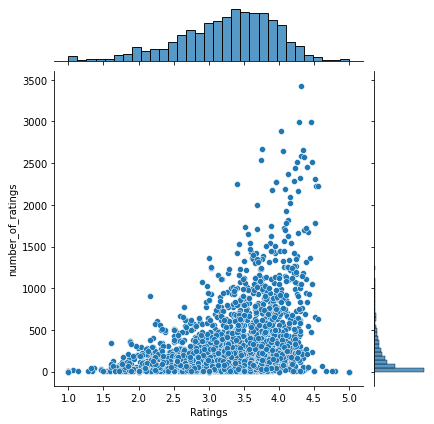

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x='Ratings',y='number_of_ratings',data=ratings)

In [ ]:
movie_matrix=merged.pivot_table(index='UserID',columns='movie_name',values='Ratings')
movie_matrix

movie_name,'Night Mother (1986),'Til There Was You (1997),...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),12 Angry Men (1957),"13th Warrior, The (1999)",187 (1997),2 Days in the Valley (1996),200 Cigarettes (1999),2001: A Space Odyssey (1968),24 7: Twenty Four Seven (1997),24-hour Woman (1998),3 Ninjas: High Noon On Mega Mountain (1998),"39 Steps, The (1935)","400 Blows, The (Les Quatre cents coups) (1959)",52 Pick-Up (1986),54 (1998),"7th Voyage of Sinbad, The (1958)",8 1/2 (1963),8 Seconds (1994),8MM (1999),Abbott and Costello Meet Frankenstein (1948),"Abominable Snowman, The (1957)",About Last Night... (1986),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Aces: Iron Eagle III (1992),"Acid House, The (1998)",Action Jackson (1988),"Actor's Revenge, An (Yukinojo Henge) (1963)",Addicted to Love (1997),"Addiction, The (1995)",Adrenalin: Fear the Rush (1996),"Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Adventures of Sebastian Cole, The (1998)","Affair of Love, An (Une Liaison Pornographique) (1999)","Affair to Remember, An (1957)",...,"Wisdom of Crocodiles, The (a.k.a. Immortality) (2000)",Wishmaster (1997),With Honors (1994),Without Limits (1998),Witness (1985),Wolf (1994),"Wolf Man, The (1941)",Woman in the Dunes (Suna no onna) (1964),"Woman of Paris, A (1923)",Woman on Top (2000),Women on the Verge of a Nervous Breakdown (1988),Wonder Boys (2000),Wonderland (1999),Woo (1998),"Wood, The (1999)","Wooden Man's Bride, The (Wu Kui) (1994)",Working Girl (1988),"World of Apu, The (Apur Sansar) (1959)","Wrong Man, The (1956)",Wrongfully Accused (1998),"X-Files: Fight the Future, The (1998)",X-Men (2000),Xiu Xiu: The Sent-Down Girl (Tian yu) (1998),Yankee Zulu (1994),"Yards, The (1999)","Year My Voice Broke, The (1987)",Year of Living Dangerously (1982),Yojimbo (1961),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
ratings.sort_values('number_of_ratings',ascending=False).head(10)

,Ratings,number_of_ratings
movie_name,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672
Saving Private Ryan (1998),4.337354,2653
Terminator 2: Judgment Day (1991),4.058513,2649
"Matrix, The (1999)",4.315830,2590
"Silence of the Lambs, The (1991)",4.351823,2578


In [ ]:
ratings.sort_values('Ratings',ascending=False).head(10)

,Ratings,number_of_ratings
movie_name,,
One Little Indian (1973),5.000000,1
Schlafes Bruder (Brother of Sleep) (1995),5.000000,1
Lured (1947),5.000000,1
Song of Freedom (1936),5.000000,1
"Baby, The (1973)",5.000000,1
I Am Cuba (Soy Cuba/Ya Kuba) (1964),4.800000,5
Lamerica (1994),4.750000,8
"Apple, The (Sib) (1998)",4.666667,9
Sanjuro (1962),4.608696,69
